In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random 

In [2]:
# INPUT: set path for data placement 
os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
os.getcwd()
random.seed(42)

In [3]:
# INPUT: data loaded to a pandas dataframe
df = pd.read_csv('telecom_churn_validation.csv')

In [4]:
# input data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
customerID          1409 non-null object
gender              1409 non-null object
SeniorCitizen       1409 non-null int64
Partner             1409 non-null object
Dependents          1409 non-null object
tenure              1409 non-null int64
PhoneService        1409 non-null object
MultipleLines       1409 non-null object
InternetService     1409 non-null object
OnlineSecurity      1409 non-null object
OnlineBackup        1409 non-null object
DeviceProtection    1409 non-null object
TechSupport         1409 non-null object
StreamingTV         1409 non-null object
StreamingMovies     1409 non-null object
Contract            1409 non-null object
PaperlessBilling    1409 non-null object
PaymentMethod       1409 non-null object
MonthlyCharges      1409 non-null float64
TotalCharges        1406 non-null float64
Churn               1409 non-null object
dtypes: float64(2), int64(2), ob

In [5]:
# INPUT: set customer identification code and target variable
customer_identity_code = 'customerID'
target_code = 'Churn'

In [6]:
# set index for customer identification code
df = df.set_index(customer_identity_code)

In [7]:
# identify target variable
df['target'] = df[target_code]

In [8]:
# set target labels from input
label_target1 = 'Yes'
label_target0 = 'No'

In [9]:
# function to recode target levels
def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [10]:
df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].sample(5)) #check changes in target recoding

            target Churn
customerID              
4698-KVLLG       0    No
2037-SGXHH       1   Yes
8559-WNQZS       0    No
5879-HMFFH       0    No
8212-CRQXP       0    No


In [11]:
# droping initial target
df = df.drop(['Churn'],axis=1)

In [12]:
feature_names = list(df.columns.values)

for column in feature_names:
    if df[column].dtypes == "object":
        print (column)
        print (df[column].value_counts(dropna=False))

gender
Female    739
Male      670
Name: gender, dtype: int64
Partner
No     728
Yes    681
Name: Partner, dtype: int64
Dependents
No     997
Yes    412
Name: Dependents, dtype: int64
PhoneService
Yes    1284
No      125
Name: PhoneService, dtype: int64
MultipleLines
No                  704
Yes                 580
No phone service    125
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    626
DSL            486
No             297
Name: InternetService, dtype: int64
OnlineSecurity
No                     735
Yes                    377
No internet service    297
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     620
Yes                    492
No internet service    297
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     615
Yes                    497
No internet service    297
Name: DeviceProtection, dtype: int64
TechSupport
No                     697
Yes                    415
No internet service    297
Name: TechSupport, dtype: int64

In [13]:
for column in feature_names:
    if df[column].dtypes != "object":
        print (column)
        print (df[column].unique())

SeniorCitizen
[0 1]
tenure
[72 68 70 61  9 51 27 22 26 28 56 52 29 71  2 23  8 37  3 65 50 31 36 10
  7 15 32 34 21 11 18 12 57 69 59  5 63 45  1 49 39  6 67  0 64 55 25 33
 35 19 60 30 66 48 54 58 46 62 41 14 17 53 24 38 47 44 16 42  4 13 40 20
 43]
MonthlyCharges
[116.85  44.8   88.55  80.8   50.1  110.05  24.5   20.85  73.5   80.55
  95.9  100.2   81.25 108.1   75.3   25.6   83.8   86.8   90.25  94.3
  20.7  104.25  80.35  43.05  81.15  76.35  79.85  89.   105.75  19.5
  19.65  19.9  116.15  20.5   20.6   59.1  109.6   88.45  79.35  19.7
  43.8   87.   107.95  60.    20.05  55.1   81.5   84.45  66.4   20.65
  69.35  20.55  88.8  109.1   49.    99.7   65.5  106.1   59.55  89.85
  59.3   20.15  71.9   19.4  104.8   30.25 105.6   91.8   23.85  89.1
  58.6   43.55  39.9   56.7   50.15  77.8   25.    66.5   34.   100.45
  88.75  93.55 104.5   89.3   97.95  44.75  19.55  45.8  104.6   70.55
  75.25  84.05  79.2   53.45  72.1   64.9   80.   101.35  19.85  50.2
  87.35  91.35  24.7   77.75 

In [14]:
remove_from_description = ['SeniorCitizen','target'] # remove non continious variables
removed_from_description = [x for x in feature_names if (x not in remove_from_description)]
#feature_names.remove(removed_from_description);
for column in removed_from_description:
    if df[column].dtypes != "object":
        print (column)
        print (df[column].describe())

tenure
count    1409.000000
mean       32.444996
std        24.477407
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
MonthlyCharges
count    1409.000000
mean       64.967530
std        29.738436
min        18.950000
25%        39.900000
50%        70.650000
75%        89.300000
max       118.600000
Name: MonthlyCharges, dtype: float64
TotalCharges
count    1406.000000
mean     2279.778770
std      2260.917174
min        19.250000
25%       417.800000
50%      1415.500000
75%      3771.912500
max      8670.100000
Name: TotalCharges, dtype: float64


In [15]:
# missing value treatments
# impute missing numeric columns with mean
numeric_columns_mean = ['MonthlyCharges','tenure','TotalCharges'] # populate with numeric columns
# impute missing numeric columns with zero
numeric_columns_zero = [] # populate with numeric columns
scale_columns = numeric_columns_mean + numeric_columns_zero
 

In [16]:
# for mean imputation
for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())
# for 0 imputation
for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

In [17]:
print(scale_columns)

['MonthlyCharges', 'tenure', 'TotalCharges']


In [18]:
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

In [19]:
# object variables converted to categories for cat.codes
object_columns = df.select_dtypes(['object']).columns

In [20]:
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [21]:
for column in object_columns:
    if df[column].dtypes=="object":
        print(column)
        df[column] = df[column].fillna(-9999)
        print(df[column].value_counts())

gender
Female    739
Male      670
Name: gender, dtype: int64
Partner
No     728
Yes    681
Name: Partner, dtype: int64
Dependents
No     997
Yes    412
Name: Dependents, dtype: int64
PhoneService
Yes    1284
No      125
Name: PhoneService, dtype: int64
MultipleLines
No                  704
Yes                 580
No phone service    125
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    626
DSL            486
No             297
Name: InternetService, dtype: int64
OnlineSecurity
No                     735
Yes                    377
No internet service    297
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     620
Yes                    492
No internet service    297
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     615
Yes                    497
No internet service    297
Name: DeviceProtection, dtype: int64
TechSupport
No                     697
Yes                    415
No internet service    297
Name: TechSupport, dtype: int64

In [22]:
for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [23]:
df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [24]:
for column in object_columns:
    print (column)
    print(df[column].value_counts())

gender
0    739
1    670
Name: gender, dtype: int64
Partner
0    728
1    681
Name: Partner, dtype: int64
Dependents
0    997
1    412
Name: Dependents, dtype: int64
PhoneService
1    1284
0     125
Name: PhoneService, dtype: int64
MultipleLines
0    704
2    580
1    125
Name: MultipleLines, dtype: int64
InternetService
1    626
0    486
2    297
Name: InternetService, dtype: int64
OnlineSecurity
0    735
2    377
1    297
Name: OnlineSecurity, dtype: int64
OnlineBackup
0    620
2    492
1    297
Name: OnlineBackup, dtype: int64
DeviceProtection
0    615
2    497
1    297
Name: DeviceProtection, dtype: int64
TechSupport
0    697
2    415
1    297
Name: TechSupport, dtype: int64
StreamingTV
0    578
2    534
1    297
Name: StreamingTV, dtype: int64
StreamingMovies
0    585
2    527
1    297
Name: StreamingMovies, dtype: int64
Contract
0    779
2    332
1    298
Name: Contract, dtype: int64
PaperlessBilling
1    808
0    601
Name: PaperlessBilling, dtype: int64
PaymentMethod
2    477
0 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 1488-PBLJN to 5609-CEBID
Data columns (total 20 columns):
gender              1409 non-null int8
SeniorCitizen       1409 non-null int64
Partner             1409 non-null int8
Dependents          1409 non-null int8
tenure              1409 non-null float64
PhoneService        1409 non-null int8
MultipleLines       1409 non-null int8
InternetService     1409 non-null int8
OnlineSecurity      1409 non-null int8
OnlineBackup        1409 non-null int8
DeviceProtection    1409 non-null int8
TechSupport         1409 non-null int8
StreamingTV         1409 non-null int8
StreamingMovies     1409 non-null int8
Contract            1409 non-null int8
PaperlessBilling    1409 non-null int8
PaymentMethod       1409 non-null int8
MonthlyCharges      1409 non-null float64
TotalCharges        1409 non-null float64
target              1409 non-null int64
dtypes: float64(3), int64(2), int8(15)
memory usage: 86.7+ KB


In [26]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
customerID,,,,,,,,,,,,,,,,,,,,
0480-KYJVA,0,0,1,1,1.616554,1,2,2,1,1,1,1,1,1,2,0,1,-1.369675,-0.219373,0
9565-JSNFM,1,0,0,0,0.227025,1,0,1,0,0,0,0,0,0,1,1,0,0.184422,0.140772,1
4879-GZLFH,0,0,1,1,0.390499,1,0,1,0,0,2,0,2,2,0,1,2,0.914376,0.706745,0
1728-BQDMA,0,0,0,0,-1.244242,1,0,0,0,0,0,0,0,0,0,0,2,-0.690178,-0.973147,0
4570-QHXHL,0,0,0,0,-0.958162,1,0,0,0,0,0,0,0,0,0,1,2,-0.713725,-0.830081,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'target'],
      dtype='object')

In [29]:
df1 = df.copy()

In [30]:
df1 = df1.drop(['target'], axis=1)

In [34]:
array = df[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
array1 = df[['target']]
X = array.values
y = array1.values
X.shape,y.shape

((1409, 15), (1409, 1))

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def evaluate(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y,y_pred)
    matrix = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)
    print("accuracy :" +str(accuracy))
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

In [37]:
# import pickle
import pickle
# load the model from disk
loaded_model_gbm = pickle.load(open('finalized_gbm.sav', 'rb'))
result = loaded_model_gbm.score(X, y)
print(result)
loaded_model_rf = pickle.load(open('finalized_rf.sav', 'rb'))
result = loaded_model_rf.score(X, y)
print(result)

0.7977288857345636
0.801277501774308


In [38]:
gbm_best_accuracy = evaluate(loaded_model_gbm,X,y)

accuracy :0.7977288857345636
matrix :
[[950  85]
 [200 174]]
report :
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1035
          1       0.67      0.47      0.55       374

avg / total       0.79      0.80      0.78      1409



In [39]:
rf_best_accuracy = evaluate(loaded_model_rf,X,y)

accuracy :0.801277501774308
matrix :
[[948  87]
 [193 181]]
report :
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1035
          1       0.68      0.48      0.56       374

avg / total       0.79      0.80      0.79      1409



In [40]:
loaded_model_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
feature_names=df[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']].columns


In [42]:
feature_importance = loaded_model_rf.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))

[ 3  1  0  4  8 11  7  5 12  6  9 10 13  2 14]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


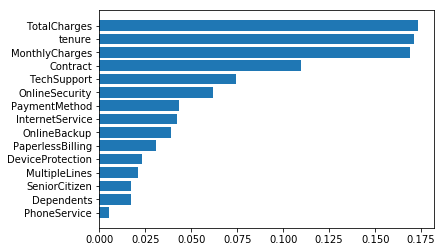

['SeniorCitizen' 'Dependents' 'tenure' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges']
[0.01753623 0.01707297 0.17122098 0.00531617 0.02106959 0.04254483
 0.0616084  0.03910195 0.02344597 0.07444541 0.10973019 0.03107537
 0.04333458 0.16916317 0.17333419]


In [43]:
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)